# PCA (Más dimensiones) - Python
# Autor: Diego Vértiz Padilla

Este análisis aplica PCA a un conjunto de datos multivariable.
Se eliminan columnas no numéricas ('Empleado'), se centran los datos,se calcula la matriz de covarianza y correlación, y se determina cuántos componentes son necesarios para explicar al menos el 95% de la varianza.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


Se asume que el archivo CSV está en el mismo directorio.

In [2]:
df = pd.read_csv("bci_clean_pca.csv")

Se elimina la columna 'Empleado' por no ser una variable explicativa, así como los valores vacíos (NaN).

In [3]:
X = df.drop(columns=["Empleado"])

# Forzar a que todo sea numérico, convirtiendo strings inválidos a NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Eliminar columnas que todavía tengan NaNs (por ejemplo, si eran puro NaN o inválidas)
X = X.dropna(axis=1, how='any')

# Rellenar NaNs restantes con la media (ya debería ser seguro)
X = X.fillna(X.mean())

Restamos la media a cada columna

In [4]:
X_centered = X - X.mean()

Matriz de covarianza

In [5]:
cov_matrix = np.cov(X_centered.T)
print("Matriz de covarianza:")
print(cov_matrix)

Matriz de covarianza:
[[ 220.5204218   122.08893768  163.33621261  224.53714485  157.78106226
   242.96795613  220.34406687  250.45495974]
 [ 122.08893768  148.52158484  147.89869814  131.62587904  139.54429725
    19.28708305   56.46527834  -10.25627091]
 [ 163.33621261  147.89869814  224.76672887  204.83984056  187.84326306
    72.05676663  117.32353121   23.08047158]
 [ 224.53714485  131.62587904  204.83984056  304.88116012  201.38306425
   345.92718789  297.14372221  364.93923945]
 [ 157.78106226  139.54429725  187.84326306  201.38306425  187.74673075
   105.25201718  143.5936008    80.00983752]
 [ 242.96795613   19.28708305   72.05676663  345.92718789  105.25201718
   935.91863353  607.15799286 1104.18612818]
 [ 220.34406687   56.46527834  117.32353121  297.14372221  143.5936008
   607.15799286  479.85893074  722.46123243]
 [ 250.45495974  -10.25627091   23.08047158  364.93923945   80.00983752
  1104.18612818  722.46123243 1386.99569996]]


Matriz de correlación


Matriz de correlación:
[[ 1.          0.67461675  0.7336553   0.86596132  0.775433    0.53481742
   0.67736096  0.45286387]
 [ 0.67461675  1.          0.80947521  0.6185591   0.83566288  0.05173122
   0.21150951 -0.02259733]
 [ 0.7336553   0.80947521  1.          0.78249779  0.91441516  0.15710489
   0.35724184  0.0413372 ]
 [ 0.86596132  0.6185591   0.78249779  1.          0.84172739  0.64759033
   0.77686307  0.56120006]
 [ 0.775433    0.83566288  0.91441516  0.84172739  1.          0.25108756
   0.47840103  0.15679046]
 [ 0.53481742  0.05173122  0.15710489  0.64759033  0.25108756  1.
   0.90599516  0.96913813]
 [ 0.67736096  0.21150951  0.35724184  0.77686307  0.47840103  0.90599516
   1.          0.8855645 ]
 [ 0.45286387 -0.02259733  0.0413372   0.56120006  0.15679046  0.96913813
   0.8855645   1.        ]]


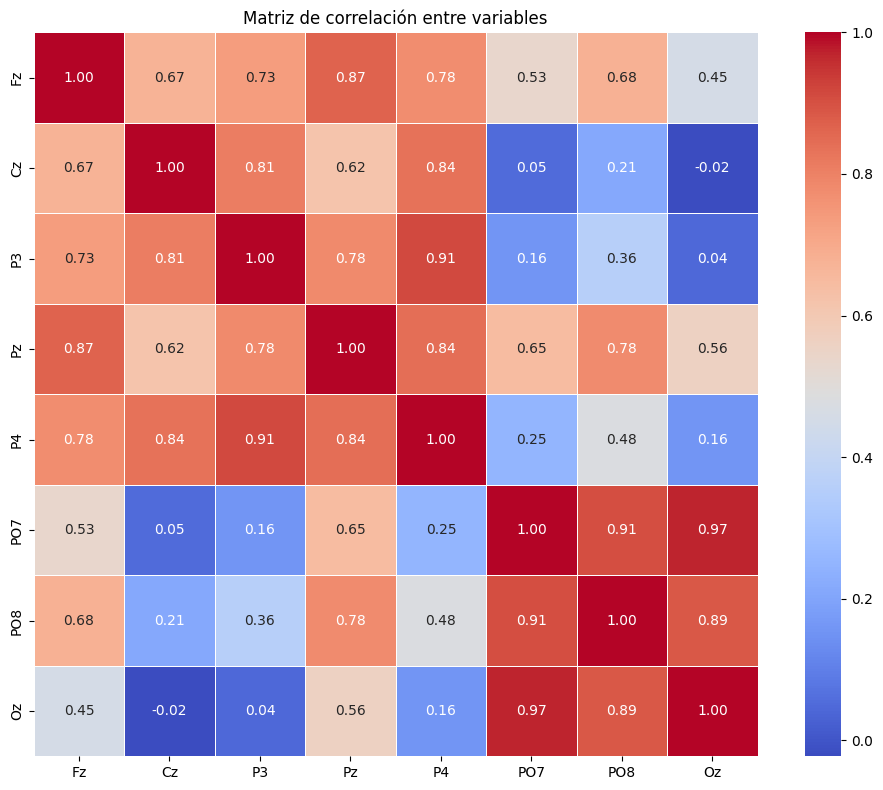

In [6]:
corr_matrix = np.corrcoef(X_centered.T)
print("\nMatriz de correlación:")
print(corr_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            xticklabels=X.columns, 
            yticklabels=X.columns,
            square=True,
            linewidths=0.5)

plt.title("Matriz de correlación entre variables")
plt.tight_layout()
plt.show()

Aplicamos PCA

In [7]:
pca = PCA()
pca.fit(X_centered)

PCA()

Varianza explicada por componente

In [8]:
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

In [9]:
print("\nVarianza explicada por componente:")
print(explained)

print("\nVarianza acumulada:")
print(cum_explained)


Varianza explicada por componente:
[0.75530061 0.19835725 0.01386111 0.01124462 0.00965149 0.00528847
 0.00416984 0.00212661]

Varianza acumulada:
[0.75530061 0.95365786 0.96751897 0.97876358 0.98841507 0.99370354
 0.99787339 1.        ]


In [10]:
n_components_95 = np.argmax(cum_explained >= 0.95) + 1
print(f"\nNúmero de componentes necesarios para explicar al menos el 95% de la varianza: {n_components_95}")


Número de componentes necesarios para explicar al menos el 95% de la varianza: 2


Proyección de Z en los PC principales

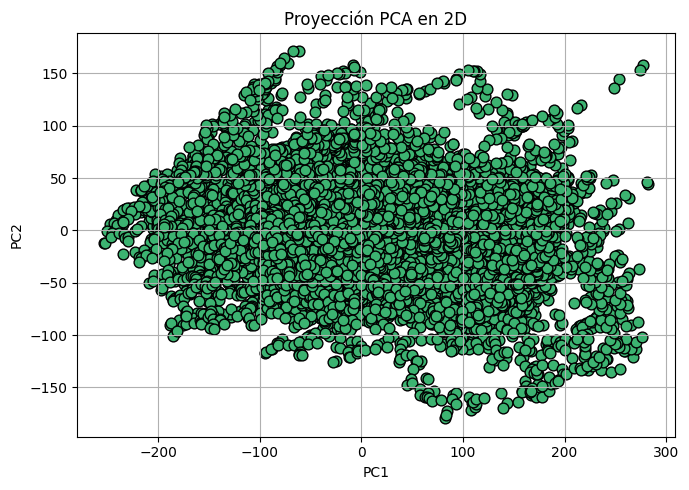

In [ ]:
Z = pca.transform(X_centered)[:, :2]  # Proyección en los dos primeros componentes

plt.figure(figsize=(7, 5))
plt.scatter(Z[:, 0], Z[:, 1], c='mediumseagreen', edgecolors='k', s=60)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA en 2D")
plt.grid(True)
plt.tight_layout()
plt.show()